**Python Libraries**

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras import layers, models
from tensorflow.keras import optimizers
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import tensorflow as tf
from tensorflow.keras.models import Sequential
from keras.layers import Input
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense,Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers

**Data Reading**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
#Training data
dir = '/content/drive/MyDrive/Bone Break Classification'
ds_train = tf.keras.preprocessing.image_dataset_from_directory(dir,
                                                              labels = 'inferred',
                                                              label_mode = 'int',
                                                              validation_split = 0.1,
                                                              subset = 'training',
                                                              shuffle = True,
                                                              color_mode = 'rgb',
                                                              image_size = (256, 256),
                                                              batch_size = 64,
                                                              seed = 50)

Found 1129 files belonging to 10 classes.
Using 1017 files for training.


In [4]:
#validation data
ds_validation = tf.keras.preprocessing.image_dataset_from_directory(dir,
                                                                    labels = 'inferred',
                                                                    label_mode = 'int',
                                                                    validation_split = 0.1,
                                                                    subset = 'validation',
                                                                    shuffle = True,
                                                                    color_mode = 'rgb',
                                                                    image_size = (256, 256),
                                                                    batch_size = 64,
                                                                    seed = 50)

Found 1129 files belonging to 10 classes.
Using 112 files for validation.


In [5]:
dataset_name = ds_train
class_name = ds_train.class_names
print(class_name)

['Avulsion fracture', 'Comminuted fracture', 'Fracture Dislocation', 'Greenstick fracture', 'Hairline Fracture', 'Impacted fracture', 'Longitudinal fracture', 'Oblique fracture', 'Pathological fracture', 'Spiral Fracture']


**Data Preprocessing**

In [6]:
#Normalize
def Normalize(image, label):
  return image/255, label

ds_train = ds_train.map(Normalize)
ds_validation = ds_validation.map(Normalize)

In [7]:
# Test and Train
X_train = []
y_train = []

for images, labels in ds_train:
    X_train.append(images)
    y_train.append(labels)

X_train = tf.concat(X_train, axis=0)
y_train = tf.concat(y_train, axis=0)

In [8]:
x_val = []
y_val = []

for images, labels in ds_validation:
    x_val.append(images)
    y_val.append(labels)

x_val = tf.concat(x_val, axis=0)
y_val = tf.concat(y_val, axis=0)

In [9]:
#One hot encoding
class_names = 10
y_train = tf.keras.utils.to_categorical(y_train, class_names)
y_val = tf.keras.utils.to_categorical(y_val, class_names)

**Visualization**

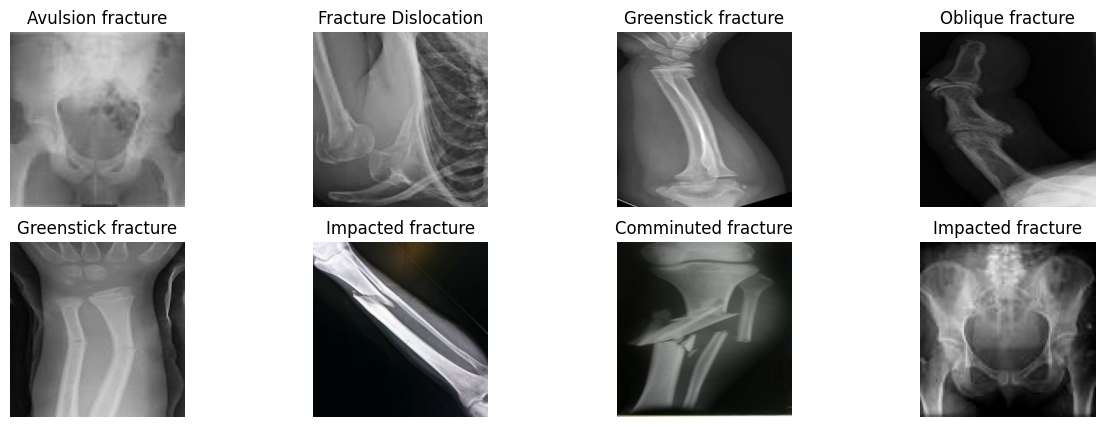

In [10]:
class_label = ["Avulsion fracture",
               "Comminuted fracture",
               "Fracture Dislocation",
               "Greenstick fracture",
              "Hairline Fracture",
               "Impacted fracture",
               "Longitudinal fracture",
               "Oblique fracture",
              "Pathological fracture",
               "Spiral Fracture"]

fig,axes = plt.subplots(2, 4, figsize=(15,5))

for i, ax in enumerate(axes.flat):
  images, labels = X_train[i], y_train[i]
  ax.imshow(images, cmap = 'gray')
  ax.set_title(f"{class_label[np.argmax(labels)]}")
  ax.axis('off')

plt.show()

**Model Building**

In [11]:
#CNN
model = Sequential()
model.add(Input(shape=(256, 256, 3)))

#First layer
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

#Second Layer
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

#Flatten and Fully connected layers
model.add(Flatten())
model.add(Dense(40, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 492032)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 40)             │    19,681,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           410 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19,757,378 (75.37 MB)

 Trainable params: 19,757,378 (75.37 MB)

 Non-trainable params: 0 (0.00 B)

In [12]:
model.compile(optimizer=Adam(learning_rate=0.0005),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [13]:
#Train the model
model.fit(X_train,y_train, epochs=5, batch_size=10, validation_data=(x_val, y_val))

Epoch 1/5
102/102 ━━━━━━━━━━━━━━━━━━━━ 178s 2s/step - accuracy: 0.1256 - loss: 2.7565 - val_accuracy: 0.1250 - val_loss: 2.2843
Epoch 2/5
102/102 ━━━━━━━━━━━━━━━━━━━━ 179s 2s/step - accuracy: 0.2213 - loss: 2.2165 - val_accuracy: 0.1786 - val_loss: 2.1867
Epoch 3/5
102/102 ━━━━━━━━━━━━━━━━━━━━ 196s 2s/step - accuracy: 0.4189 - loss: 1.7608 - val_accuracy: 0.1964 - val_loss: 2.1815
Epoch 4/5
102/102 ━━━━━━━━━━━━━━━━━━━━ 197s 2s/step - accuracy: 0.6786 - loss: 1.0705 - val_accuracy: 0.2679 - val_loss: 2.8242
Epoch 5/5
102/102 ━━━━━━━━━━━━━━━━━━━━ 170s 2s/step - accuracy: 0.8656 - loss: 0.5364 - val_accuracy: 0.3036 - val_loss: 3.3266


In [14]:
#Evaluate the model
loss, accuracy = model.evaluate(x_val, y_val)
print('Test accuracy:', accuracy)

4/4 ━━━━━━━━━━━━━━━━━━━━ 6s 1s/step - accuracy: 0.3016 - loss: 3.2638
Test accuracy: 0.3035714328289032


In [15]:
predictions = model.predict(x_val)
print('Predictions:', predictions)

4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step
Predictions: [[4.4864105e-04 2.1942215e-01 6.0167891e-04 ... 3.5163667e-02
  4.5782864e-01 3.7968069e-04]
 [6.2915426e-01 8.3148444e-07 2.8251848e-01 ... 7.9392649e-02
  2.1737826e-03 5.9898516e-06]
 [6.4926379e-04 9.0184643e-05 9.9891782e-01 ... 6.4396518e-05
  5.6611052e-06 1.1034899e-06]
 ...
 [1.5519180e-04 4.8214401e-06 3.9766701e-03 ... 6.2452361e-02
  6.6131549e-03 1.8175389e-05]
 [1.3119284e-02 9.2630120e-07 5.1324996e-06 ... 2.4749200e-01
  5.8086729e-04 7.3866463e-01]
 [6.1342709e-02 2.3907635e-03 2.1553688e-01 ... 4.4456474e-02
  3.3542614e-02 1.3277630e-04]]


                       precision    recall  f1-score   support

    Avulsion fracture       0.35      0.33      0.34        18
  Comminuted fracture       0.42      0.42      0.42        12
 Fracture Dislocation       0.33      0.60      0.43        15
  Greenstick fracture       0.27      0.23      0.25        13
    Hairline Fracture       0.00      0.00      0.00         8
    Impacted fracture       0.00      0.00      0.00         5
Longitudinal fracture       0.36      0.36      0.36        11
     Oblique fracture       0.09      0.20      0.12         5
Pathological fracture       0.71      0.31      0.43        16
      Spiral Fracture       0.17      0.11      0.13         9

             accuracy                           0.30       112
            macro avg       0.27      0.26      0.25       112
         weighted avg       0.33      0.30      0.30       112



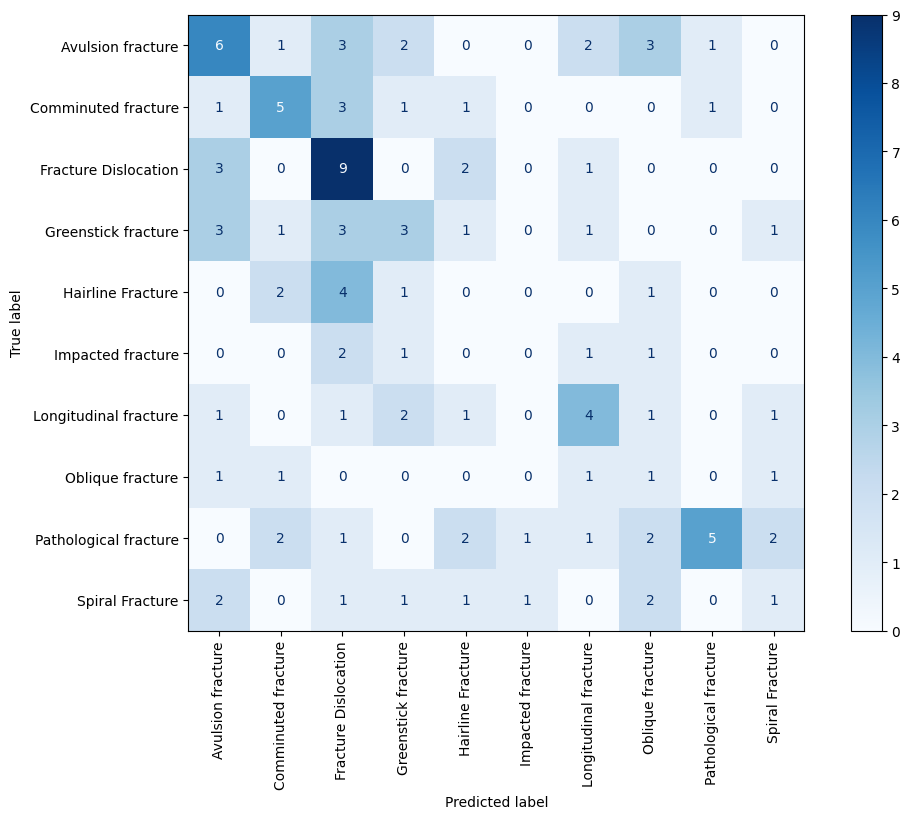

In [16]:
y_pred = np.argmax(predictions, axis=1)
y_true = np.argmax(y_val, axis=1)

print(classification_report(y_true, y_pred, target_names=class_label))


cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_label)
fig, ax = plt.subplots(figsize=(12,8))
disp.plot(ax=ax, cmap=plt.cm.Blues)
plt.xticks(rotation=90)
plt.show()

In [17]:
model.save('bone_fracture_break_model.h5')

In [18]:
from google.colab import files
files.download('bone_fracture_break_model.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>